<h1>Group Members</h1>
Lionel Irakoze - 659056 </br>
Joseph Omondi Odhiambo - 659413 </br>
Victor Abedi - 659265 </br>




In [ ]:
import pandas as pd

<h1>Loading The Dataset</h1>

In [2]:
path = "diabetes.xls"
diabetes = pd.read_csv(path)

NameError: name 'pd' is not defined

<h1>Inspecting The Dataset</h1>

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h1>Cleaning The Data</h1>

In [ ]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

In [ ]:
print(diabetes_mod.shape)

(724, 9)


<h1>Spliting the data into training and test sets</h1>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

<h1>Training a decision tree classifier that is pruned at a depth of 6</h1>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetes_mod.Outcome, random_state=0)

In [ ]:
tree= DecisionTreeClassifier(max_depth=6, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

<h1>Visualizing The Tree</h1>

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"], feature_names=feature_names, impurity=False, filled=True)


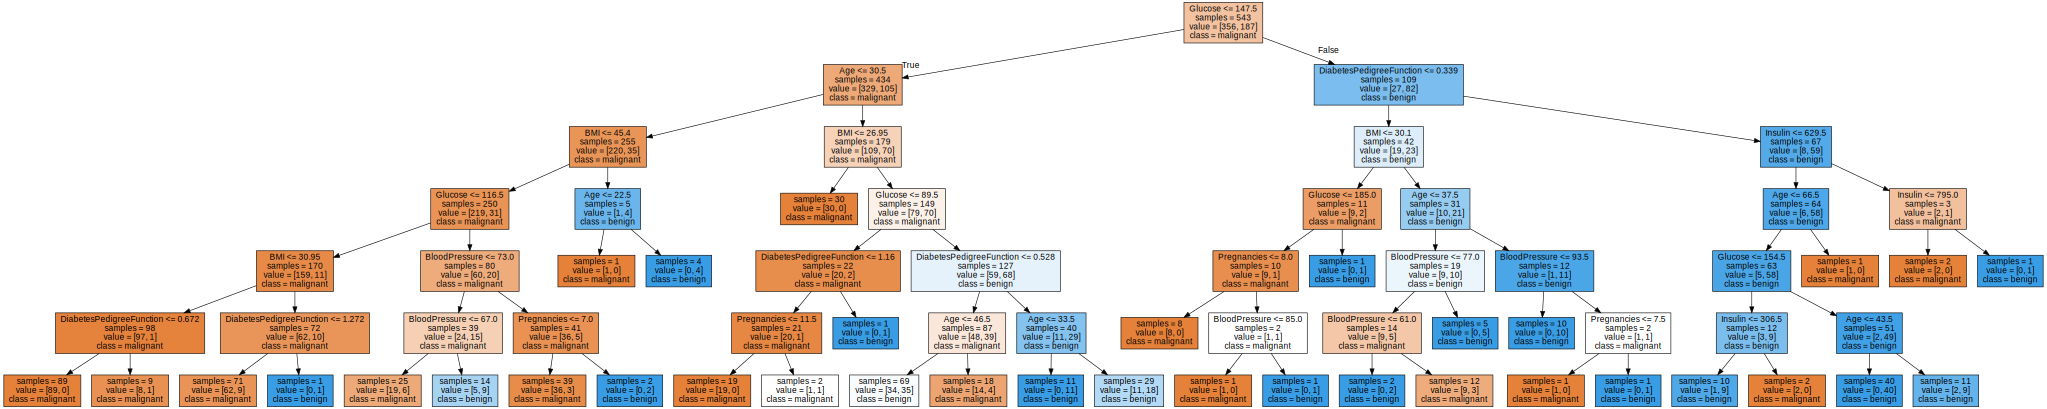

In [ ]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

<h1>Showing the model’s accuracy on the training and test data.</h1>

In [ ]:
print("Accuracy on Training set: {:.3f}".format(tree.score(X_train, y_train)));
print("Accuracy on Test set: {:.3f}".format(tree.score(X_test, y_test)));

Accuracy on Training set: 0.853
Accuracy on Test set: 0.685


<h1> Make a prediction for the person with the following information: 3, 125, 68, 30, 120, 37, 0.4, 
28.</h1>

In [ ]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
result=tree.predict([[3, 125, 68, 30, 120, 37, 0.4, 28]])

In [ ]:
print(result)

[1]
